In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/Dataset/Train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [52]:
train_path = 'Dataset/Train/'
test_path = 'Dataset/Test'

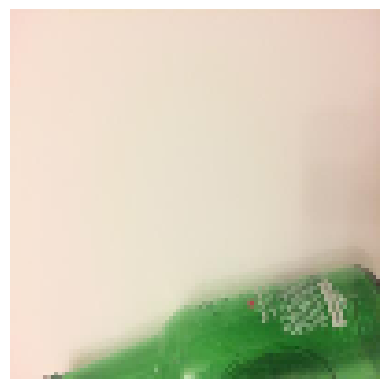

In [54]:
img = load_img(train_path + "glass/glass10.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [55]:
images = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

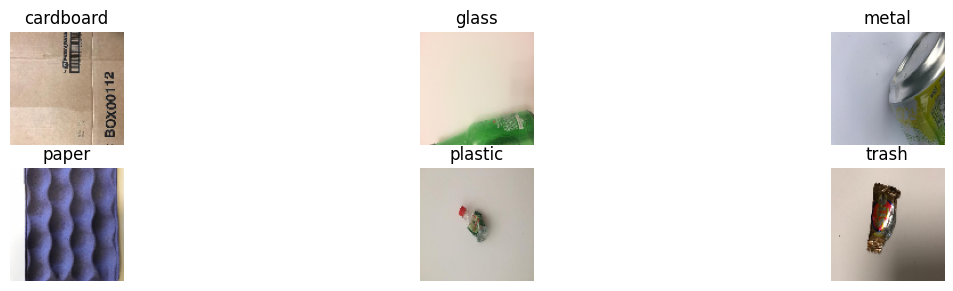

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(6):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i]+"/"+images[i]+"10.jpg", target_size=(100,100)))

In [65]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [66]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

6


In [68]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [69]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [70]:
batch_size = 32

In [71]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 2311 images belonging to 6 classes.
Found 216 images belonging to 6 classes.


In [72]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

C:\Users\zelih\AppData\Local\Temp\ipykernel_4612\3809917276.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/50
50/50 [==============================] - 72s 1s/step - loss: 1.7319 - accuracy: 0.2597 - val_loss: 1.9578 - val_accuracy: 0.1898
Epoch 2/50
50/50 [==============================] - 53s 1s/step - loss: 1.5395 - accuracy: 0.3467
Epoch 3/50
50/50 [==============================] - 44s 885ms/step - loss: 1.3955 - accuracy: 0.4279
Epoch 4/50
50/50 [==============================] - 48s 953ms/step - loss: 1.3491 - accuracy: 0.4489
Epoch 5/50
50/50 [==============================] - 45s 899ms/step - loss: 1.2914 - accuracy: 0.4975
Epoch 6/50
50/50 [==============================] - 34s 676ms/step - loss: 1.2660 - accuracy: 0.5162
Epoch 7/50
50/50 [==============================] - 36s 695ms/step - loss: 1.1807 - accuracy: 0.5450
Epoch 8/50
50/50 [==============================] - 26s 512ms/step - loss: 1.1800 - accuracy: 0.5505
Epoch 9/50
50/50 [==============================] - 21s 426ms/step - loss: 1.1526 - accuracy: 0.5448
Epoch 10/50
50/50 [==============================] - 20

In [75]:
model.save_weights("example.h5")

In [76]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [91]:
import numpy as np
from tensorflow.keras.preprocessing import image

model.load_weights('example.h5')
# Test görüntüsünü yükleme ve yeniden boyutlandırma
test_image = image.load_img('paper153.jpg', target_size=(100, 100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Tahminleme yapma
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Sonucu yazdırma
print("Tahmin edilen sınıf:", className[predicted_class])


1/1 [==============================] - 0s 29ms/step
Tahmin edilen sınıf: Dataset/Train\paper
